In [1]:
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch.optim import Adam
from torch.distributions.normal import Normal

import torchvision
from torchvision import transforms, datasets

In [2]:
from realNVP.realnvp import RealNVP, Hyperparameters
from realNVP.data_utils import DataInfo, logit_transform
from realNVP.train import train_real_nvp

In [3]:
from VAE.models import VAE
from VAE.train import train_vae

In [4]:
from GAN.models import Generator, Discriminator
from GAN.train import train_gan

In [4]:
train_transform = transforms.Compose([
    transforms.CenterCrop(168),
    transforms.Resize(64),
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.CenterCrop(168),
    transforms.Resize(64),
    transforms.ToTensor(),
])

In [5]:
train_dataset = torchvision.datasets.CelebA(root="data/", split="train", transform=train_transform)
test_dataset = torchvision.datasets.CelebA(root="data/", split="test", transform=test_transform)

torch.Size([3, 64, 64])


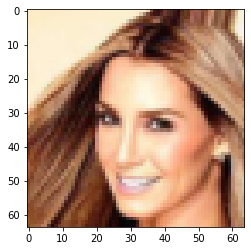

In [6]:
x, y = train_dataset[0]
print(x.shape)
plt.imshow(x.permute((1, 2, 0)).numpy())

In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [7]:
datainfo = DataInfo("celeba", 3, 64)
prior = Normal(loc=0.0, scale=1.0)
hyperparams = Hyperparameters()

flow = RealNVP(datainfo, prior, hyperparams)
optim = Adam(flow.parameters(), lr=3e-3)

In [ ]:
train_real_nvp(flow, optim, train_loader, test_loader, 5)

In [11]:
vae = VAE(3, 128, None)
optim = Adam(vae.parameters(), lr=2e-3)

In [12]:
train_vae(vae, optim, train_loader, test_loader, 5)